In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

In [3]:
from networkx import karate_club_graph, to_numpy_matrix

In [4]:
zkc = karate_club_graph()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


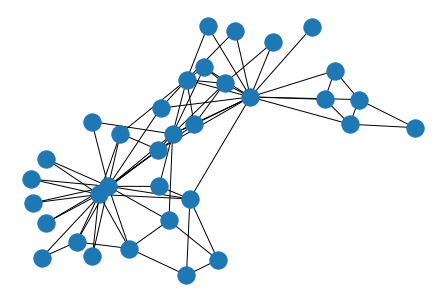

In [5]:
nx.draw(zkc, with_label=True)

In [6]:
zkc.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [7]:
order = sorted(list(zkc.nodes()))

In [8]:
order

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [9]:
A = to_numpy_matrix(zkc, nodelist=order)

In [10]:
print(A)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [11]:
I = np.eye(zkc.number_of_nodes())

In [12]:
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
A_hat = A + I

In [14]:
A_hat

matrix([[1., 1., 1., ..., 1., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.]])

In [15]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [16]:
D_hat

matrix([[17.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 10.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 11., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., 13.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 18.]])

In [17]:
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(), 4))

In [21]:
W_1.shape[0]

34

In [22]:
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

In [23]:
W_2

array([[ 1.89462157, -0.05956633],
       [-0.53745679, -2.4067033 ],
       [ 1.90179536, -1.06472888],
       [-0.42222111,  0.50189039]])

In [26]:
def relu(X):
    return np.maximum(0,X)

In [27]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

In [28]:
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [29]:
output

matrix([[1.79473034, 0.        ],
        [1.88989583, 0.        ],
        [2.00617073, 0.        ],
        [1.62548957, 0.        ],
        [2.21958196, 0.        ],
        [1.85949945, 0.        ],
        [1.76364626, 0.05087866],
        [1.68828004, 0.        ],
        [1.69535182, 0.        ],
        [1.73840528, 0.        ],
        [2.11215812, 0.        ],
        [1.62919284, 0.        ],
        [1.22873725, 0.        ],
        [1.69524824, 0.        ],
        [0.78960165, 0.        ],
        [1.44203289, 0.        ],
        [1.53562221, 0.14361207],
        [2.14020476, 0.        ],
        [1.21012107, 0.        ],
        [1.40448978, 0.        ],
        [1.28198334, 0.        ],
        [1.61763999, 0.        ],
        [0.92311833, 0.        ],
        [1.69625193, 0.        ],
        [2.17576829, 0.        ],
        [1.78048118, 0.        ],
        [0.68114015, 0.        ],
        [1.81271516, 0.        ],
        [1.7243083 , 0.        ],
        [0.978

In [30]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

In [31]:
feature_representations 

{0: array([1.79473034, 0.        ]),
 1: array([1.88989583, 0.        ]),
 2: array([2.00617073, 0.        ]),
 3: array([1.62548957, 0.        ]),
 4: array([2.21958196, 0.        ]),
 5: array([1.85949945, 0.        ]),
 6: array([1.76364626, 0.05087866]),
 7: array([1.68828004, 0.        ]),
 8: array([1.69535182, 0.        ]),
 9: array([1.73840528, 0.        ]),
 10: array([2.11215812, 0.        ]),
 11: array([1.62919284, 0.        ]),
 12: array([1.22873725, 0.        ]),
 13: array([1.69524824, 0.        ]),
 14: array([0.78960165, 0.        ]),
 15: array([1.44203289, 0.        ]),
 16: array([1.53562221, 0.14361207]),
 17: array([2.14020476, 0.        ]),
 18: array([1.21012107, 0.        ]),
 19: array([1.40448978, 0.        ]),
 20: array([1.28198334, 0.        ]),
 21: array([1.61763999, 0.        ]),
 22: array([0.92311833, 0.        ]),
 23: array([1.69625193, 0.        ]),
 24: array([2.17576829, 0.        ]),
 25: array([1.78048118, 0.        ]),
 26: array([0.68114015